In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.seasonal import STL
from scipy import signal
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.diagnostic import het_breuschpagan

In [2]:
data_meteo = pd.read_csv('../data_st/data_meteo_kk.csv')

In [5]:
def signal_divide(station_name, table_data=data_meteo):
    data = table_data.loc[table_data['Название метеостанции']==station_name]
    data_pd = data['Максимальная скорость'] 
    stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)
    plt.subplots(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.plot(stl_data.resid/(stl_data.trend + stl_data.seasonal))
    plt.title(station_name)
    
    plt.subplot(1, 2, 2)
    plt.psd((stl_data.resid/(stl_data.trend + stl_data.seasonal)).dropna())
    plt.title(station_name + ', PSD')

    plt.show()

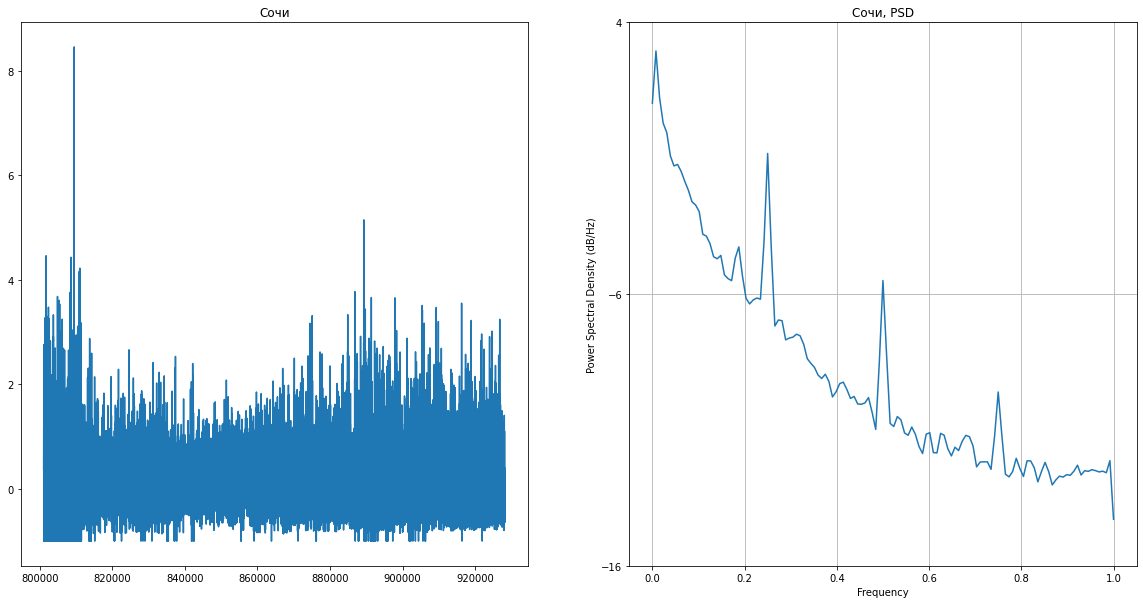

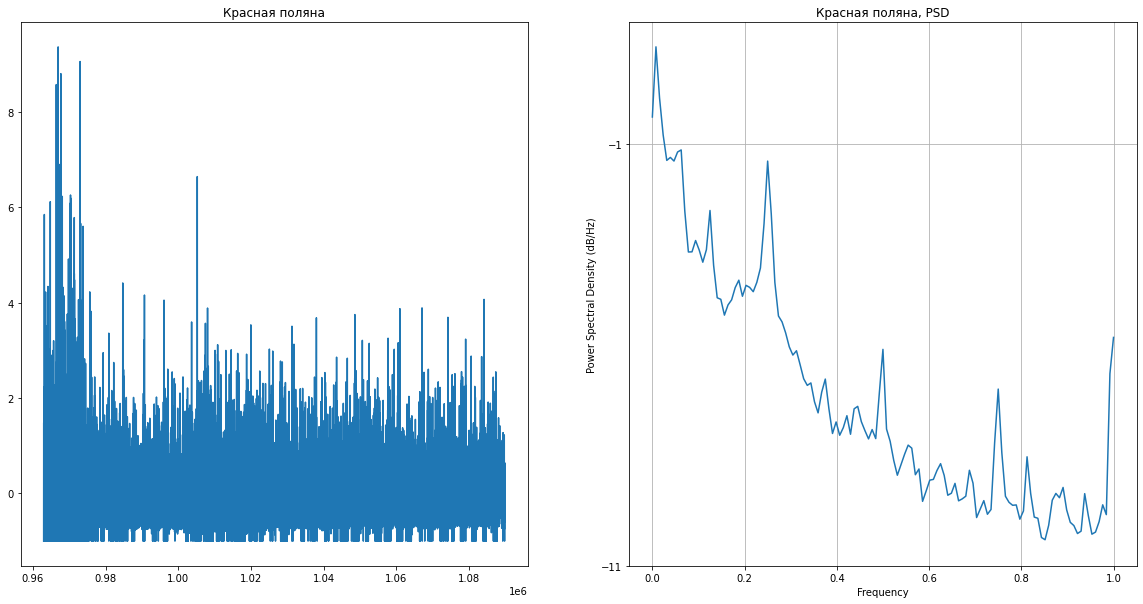

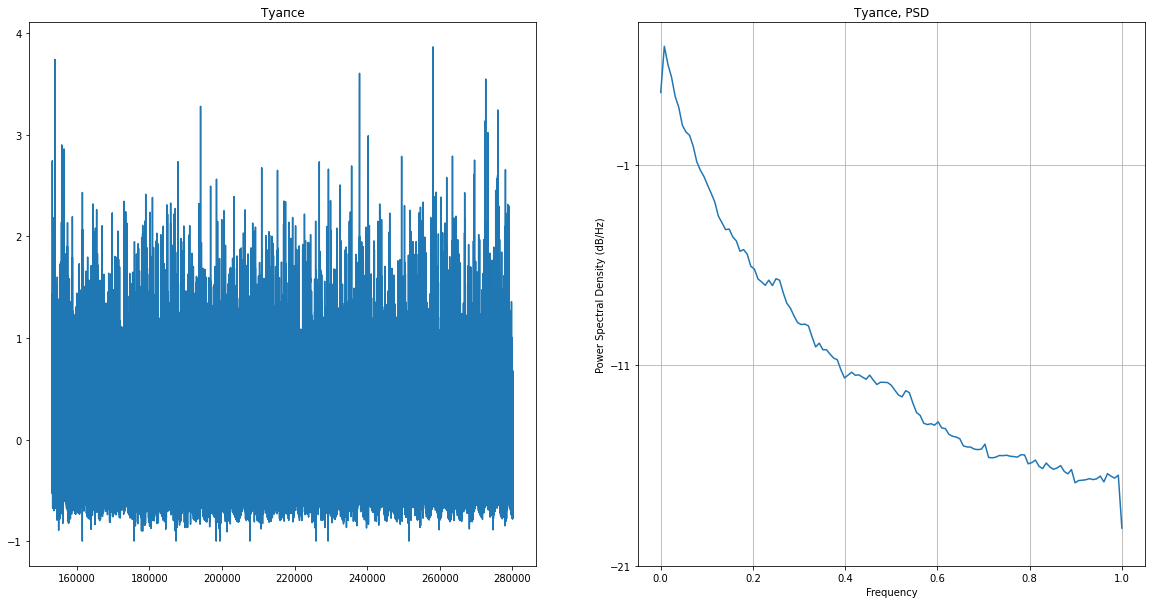

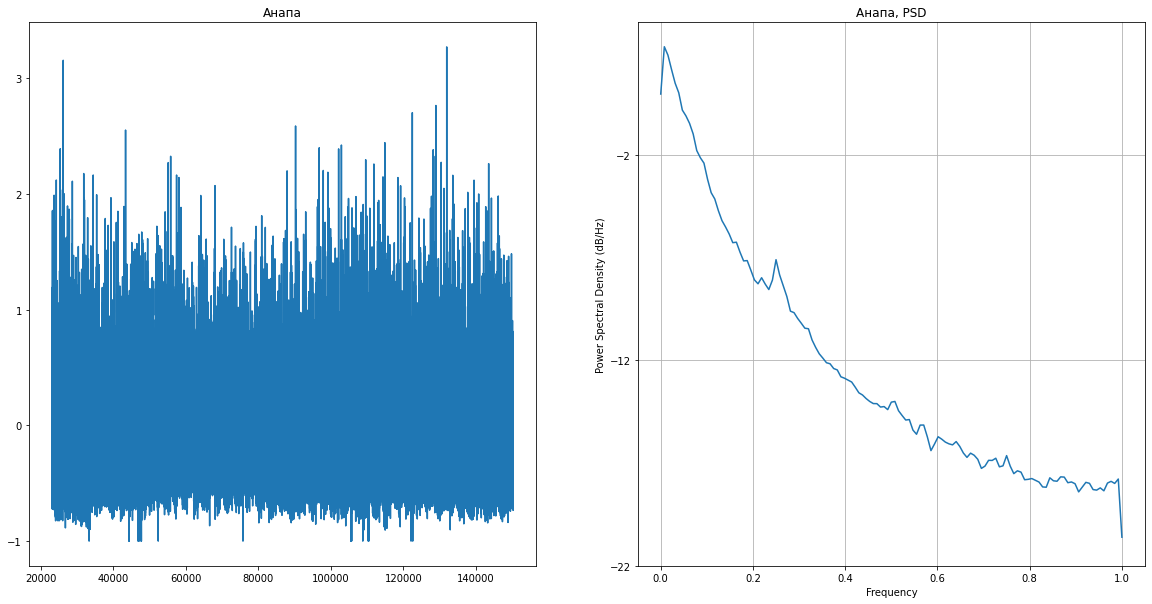

In [8]:
st_list = ['Сочи', 'Красная поляна', 'Туапсе', 'Анапа']
for name  in st_list:
    signal_divide(name)

In [9]:
def signal_divide_mean(station_name, table_data=data_meteo):
    data = table_data.loc[table_data['Название метеостанции']==station_name]
    data_pd = data['Средняя скорость ветра']
    stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)
    plt.subplots(figsize=(20,10))
    plt.subplot(1, 2, 1)
    plt.plot(stl_data.resid/(stl_data.trend + stl_data.seasonal))
    plt.title(station_name)
    
    plt.subplot(1, 2, 2)
    plt.psd((stl_data.resid/(stl_data.trend + stl_data.seasonal)).dropna())
    plt.title(station_name + ', PSD')

    plt.show()

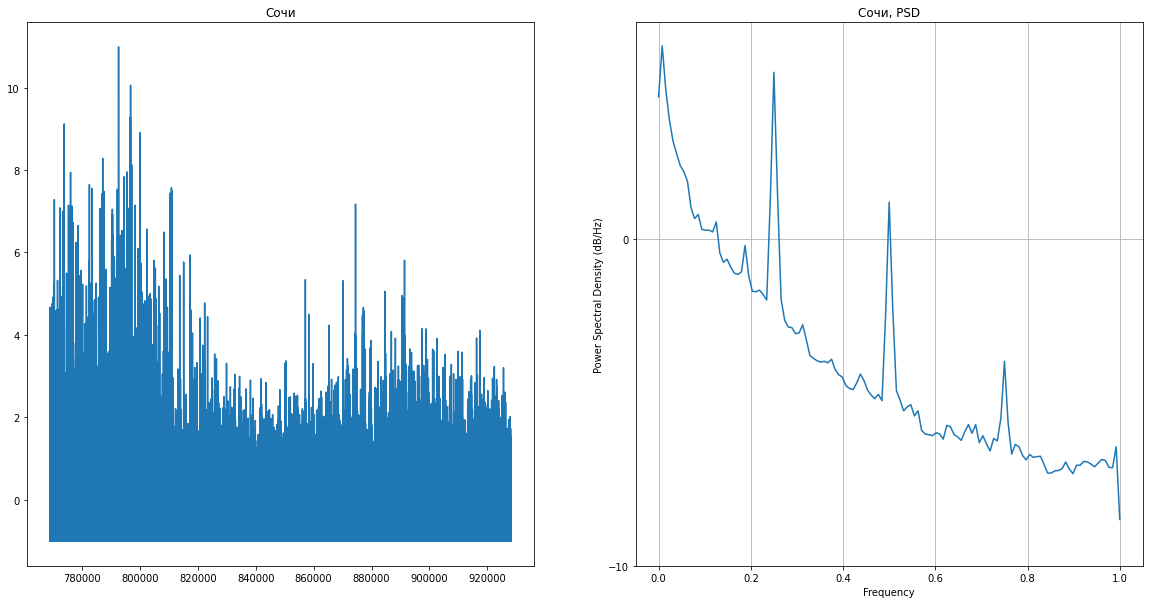

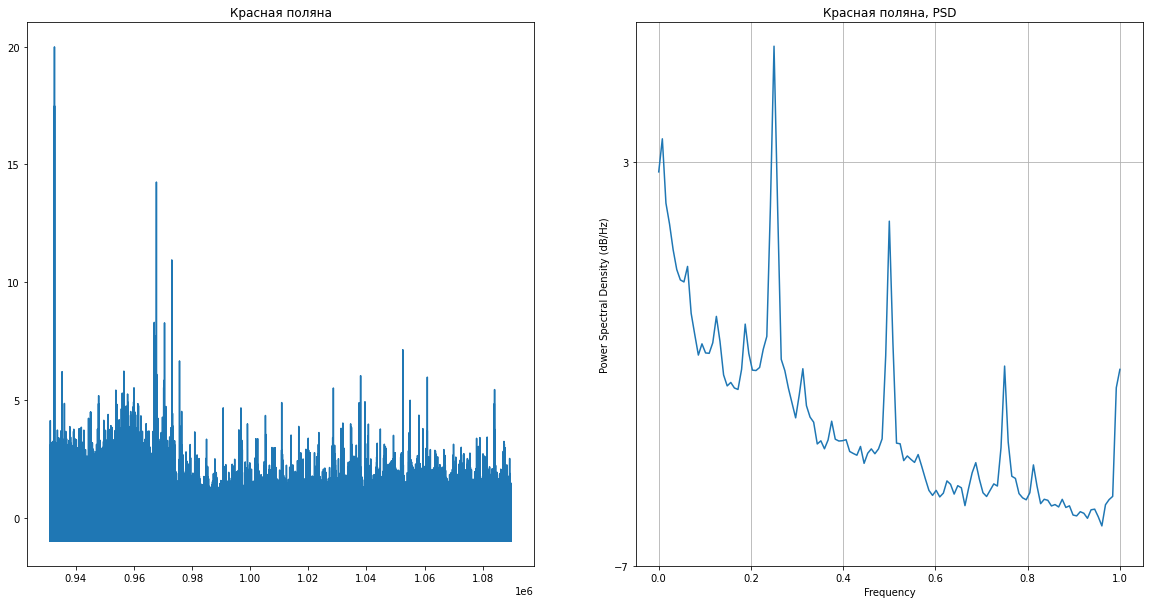

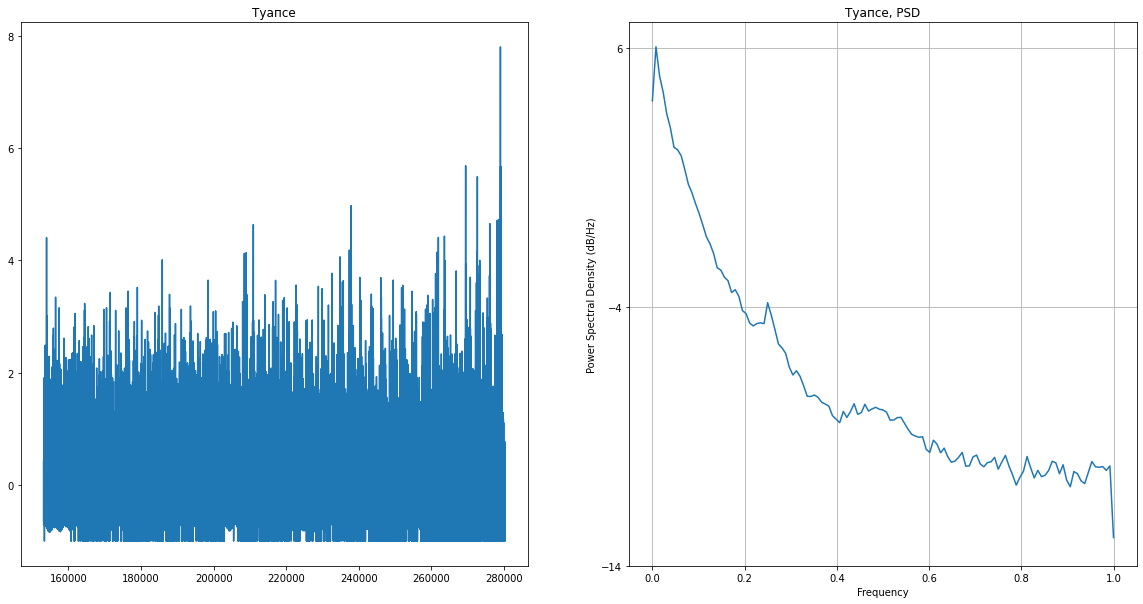

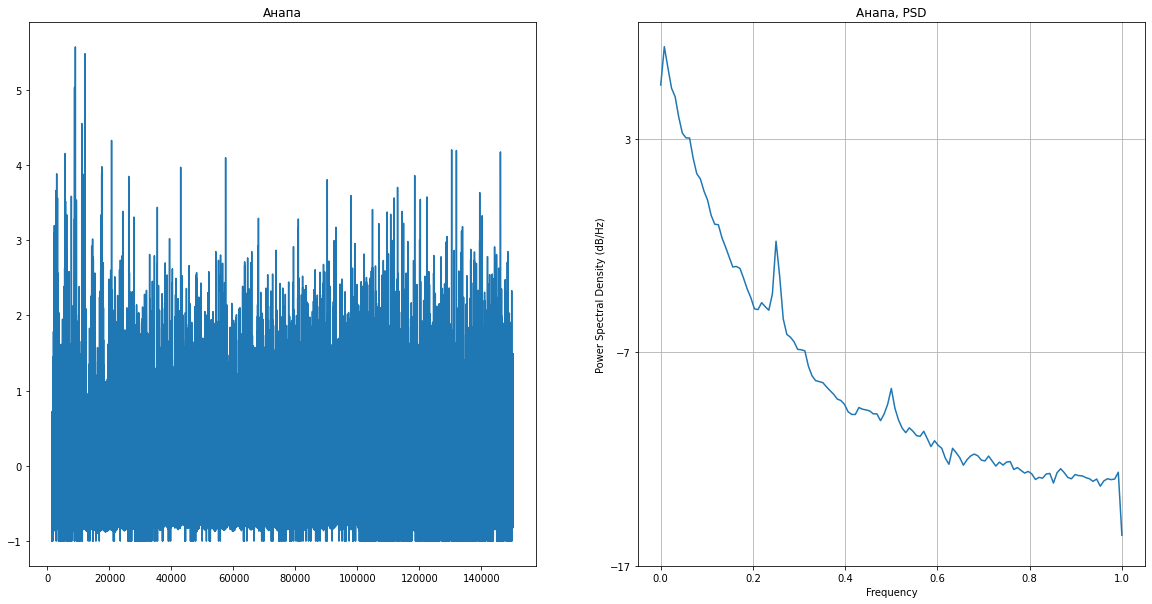

In [11]:
st_list = ['Сочи', 'Красная поляна', 'Туапсе', 'Анапа']
for name  in st_list:
    signal_divide_mean(name)

In [5]:
data = data_meteo.loc[data_meteo['Название метеостанции']=='Анапа']
data_pd = data['Средняя скорость ветра']
data = data['Средняя скорость ветра'].values

In [6]:
stl_data = seasonal_decompose(data_pd.dropna(), period=365*8)

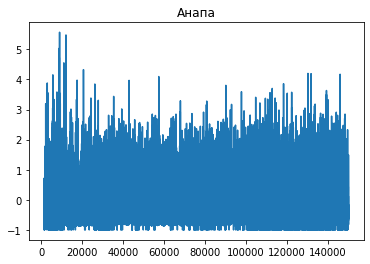

In [12]:
plt.plot(stl_data.resid/(stl_data.trend + stl_data.seasonal))
plt.title('Анапа')
plt.show()

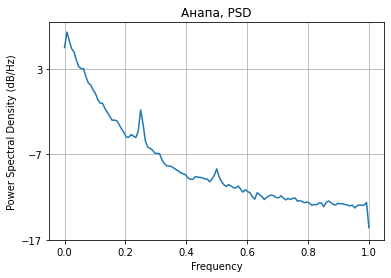

In [13]:
plt.psd((stl_data.resid/(stl_data.trend + stl_data.seasonal)).dropna(), label='Анапа')
plt.title('Анапа, PSD')
plt.show()

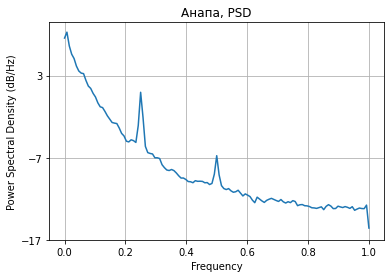

In [14]:
plt.psd(((stl_data.resid + stl_data.seasonal)/(stl_data.trend)).dropna(), label='Анапа')
plt.title('Анапа, PSD')
plt.show()